# Проектная работа

# Шаг 1. Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный.

# Путь к файлам

1. /datasets/visits_log.csv
2. datasets/orders_log.csv
3. datasets/costs.csv

# Задачи

1. Предобработка visits
2. Предобработка orders
3. Предобработка costs

# Шаг 2. Постройте отчёты и посчитайте метрики

1. Анализ продуктовых метрик
2. Анализ метрик продаж
3. Анализ маркетинговых каналов


# Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?

1. Какие источники/платформы вы бы порекомендовали?
2. Объясните свой выбор: на какие метрики вы ориентируетесь? Почему?
3.Какие выводы вы сделали, узнав значение метрик?

# Описание данных

# Таблица visits (лог сервера с информацией о посещениях сайта):


Uid — уникальный идентификатор пользователя

Device — категория устройства пользователя

Start Ts — дата и время начала сессии

End Ts — дата и время окончания сессии

Source Id — идентификатор рекламного источника, из которого пришел пользователь

# Таблица orders (информация о заказах):

Uid — уникальный id пользователя, который сделал заказ

Buy Ts — дата и время заказа

Revenue — выручка Яндекс.Афиши с этого заказа

# Таблица costs (информация о затратах на маркетинг):

source_id — идентификатор рекламного источника

dt — дата

costs — затраты на этот рекламный источник в этот день

# Шаг 1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

# visits

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [6]:
visits.duplicated().sum()

0

In [7]:
visits.columns.to_list()

['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid']

In [8]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits = visits[['device', 'source_id', 'uid', 'start_ts', 'end_ts']]

In [9]:
visits

,device,source_id,uid,start_ts,end_ts
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00
...,...,...,...,...,...
359395,desktop,2,18363291481961487539,2017-07-29 19:07:00,2017-07-29 19:07:19
359396,touch,1,18370831553019119586,2018-01-25 17:38:00,2018-01-25 17:38:19
359397,desktop,4,18387297585500748294,2018-03-03 10:12:00,2018-03-03 10:12:19
359398,desktop,5,18388616944624776485,2017-11-02 10:12:00,2017-11-02 10:12:19


In [10]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [11]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
source_id    359400 non-null int64
uid          359400 non-null uint64
start_ts     359400 non-null datetime64[ns]
end_ts       359400 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


<div class="alert alert-info"> <b></b> В данной таблице, нет дубликатов.Такк же привела end_ts и start_ts к типу datetime. И теперь впорядке название сталбцов.</div>

# orders

In [12]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [14]:
orders.duplicated().sum()

0

In [15]:
orders.columns.to_list()

['Buy Ts', 'Revenue', 'Uid']

In [16]:
orders.columns = ['bay_ts', 'revenue', 'uid']

In [17]:
orders = orders[['uid', 'revenue', 'bay_ts']]

In [18]:
orders['bay_ts'] = pd.to_datetime(orders['bay_ts'], format = '%Y-%m-%d %H:%M:%S')

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
uid        50415 non-null uint64
revenue    50415 non-null float64
bay_ts     50415 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


<div class="alert alert-info"> <b></b> В данной таблице, нет дубликатов.Такк же привела bay_ts к типу datetime. И теперь впорядке название сталбцов.</div>

# costs

In [20]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [21]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [22]:
costs.duplicated().sum()

0

In [23]:
costs.columns.to_list()

['source_id', 'dt', 'costs']

In [24]:
costs.columns = ['source_id', 'date', 'costs']
costs = costs[['source_id', 'costs', 'date']]

In [25]:
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m-%d')

In [26]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
costs        2542 non-null float64
date         2542 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<div class="alert alert-info"> <b></b> В данной таблице, нет дубликатов.Такк же привела date к типу datetime. И теперь впорядке название сталбцов.</div>

# Шаг 2. Постройте отчёты и посчитайте метрики

# Анализ продуктовых метрик

Сколько людей пользуются в день, неделю, месяц?

In [27]:
# Добавление в таблицу visits столбцов с месяцем, неделей и датой
visits['session_month']  = visits['start_ts'].astype('datetime64[M]')
visits['session_week']  = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].astype('datetime64[D]')

Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее

In [28]:
# Посчитаем среднее кол-во, использующих продукт людей
mau_total = visits.groupby('session_month').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby('session_week').agg({'uid': 'nunique'}).mean()
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()

In [29]:
print(int(mau_total))
print(int(wau_total))
print(int(dau_total))

23228
5724
907


In [30]:
# Посчитаем регулярность использования
sticky_wau = dau_total / wau_total *100
sticky_mau = dau_total / mau_total *100

In [31]:
print(float(sticky_wau.round(2)))
print(float(sticky_mau.round(2)))

15.86
3.91


# Сколько сессий в день?

In [32]:
# Группировка данных и расчет кол-во сессий в день
sessions_user = visits.groupby('session_date').agg({'uid': ['count']})
sessions_user.columns = ['sum_sessions']
sessions_user['sum_sessions'].mean()

987.3626373626373

Далее определим сколько сессий приходится на одного пользователя в месяц

In [33]:
# Группировка данных и расчет кол-во сессий на одного пользователя в месяц
sessions_user = visits.groupby('session_month').agg({'uid': ['count','nunique']})
sessions_user.columns = ['n_sessions', 'n_users']
sessions_user['sess_per_user'] = (sessions_user['n_sessions'] / sessions_user['n_users'])
sessions_user

,n_sessions,n_users,sess_per_user
session_month,,,
2017-06-01,16505,13259,1.244815
2017-07-01,17828,14183,1.256998
2017-08-01,14355,11631,1.234202
2017-09-01,23907,18975,1.259921
2017-10-01,37903,29692,1.276539
2017-11-01,43969,32797,1.340641
2017-12-01,41983,31557,1.330386
2018-01-01,36939,28716,1.286356
2018-02-01,37182,28749,1.293332


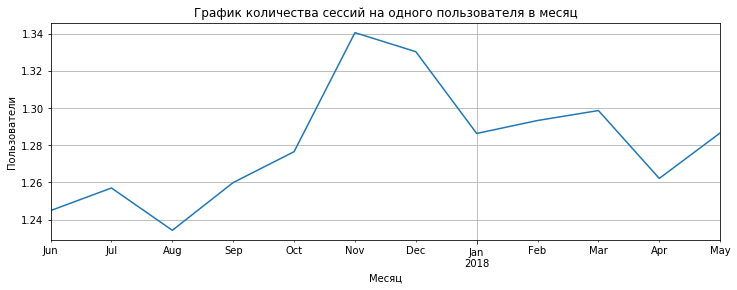

In [34]:
ax = sessions_user['sess_per_user'].plot(grid=True, figsize=(12, 4))
plt.title('График количества сессий на одного пользователя в месяц')
ax.set_xlabel('Месяц')
ax.set_ylabel('Пользователи')
plt.show();

Вывод
В месяц один пользователь в среднем проводит в приложении максимум 1.3 сессии. Не сказать, что продукт используется регулярно

# Сколько длится одна сессия?

Найдем сколько в среднем длится одна сессия

In [35]:
# Добавим столбец и посчитаем среднее
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration_sec'].mean()

643.506488592098

Посмотрим на распределение

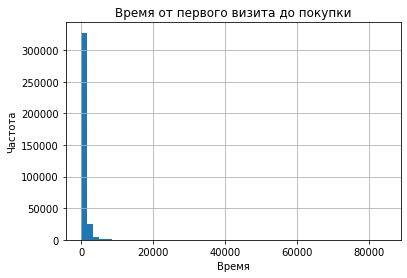

In [36]:
# Построим гистограмму
ax = visits['session_duration_sec'].hist(bins=50)
plt.title('Время от первого визита до покупки')
ax.set_xlabel('Время')
ax.set_ylabel('Частота')
plt.show();

Длина сессий распределена неравномерно, поэтому далее рассчитаем моду:

In [37]:
int(visits['session_duration_sec'].mode())

60

Вывод
Мода равняется 60 секундам. Если пользователь успевает за это время сделать заказ, то всё отлично, а если нет — нужно проверить, что ему мешает.

# Как часто люди возвращаются?

In [38]:
# Пересохраню данные в отдельный датафрейм
user_activity = visits[['uid','start_ts','source_id','device']]

# Нахожу первый заход на сайт
first_session_date = user_activity.groupby(['uid'])['start_ts'].min()
first_session_date.name = 'first_session_date'

# Добавляем столбец
user_activity = user_activity.join(first_session_date,on='uid')

# Форматируем в нужный формат
user_activity['session_month'] = user_activity['start_ts'].astype('datetime64[M]')
user_activity['first_session_month'] = user_activity['first_session_date'].astype('datetime64[M]')

user_activity.head()

,uid,start_ts,source_id,device,first_session_date,session_month,first_session_month
0,16879256277535980062,2017-12-20 17:20:00,4,touch,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,104060357244891740,2018-02-19 16:53:00,2,desktop,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,7459035603376831527,2017-07-01 01:54:00,5,touch,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,16174680259334210214,2018-05-20 10:59:00,9,desktop,2018-03-09 20:05:00,2018-05-01,2018-03-01
4,9969694820036681168,2017-12-27 14:06:00,3,desktop,2017-12-27 14:06:00,2017-12-01,2017-12-01


Найдем время существование когорты, вычтем из даты захода дату первого посещения. Переведем в месяцы.

In [39]:
# Время существование когорты
user_activity['cohort_lifetime'] = user_activity['session_month'] - user_activity['first_session_month'] 

# <Перевожу в месяц>
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1,'M')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].round().astype('int')

Найдем количество уникальных пользователей в каждом месяце.

In [40]:
# Группировка данных
cohorts = user_activity.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

Найдем количество пользователей изначально в каждой когорте

In [41]:
# Расчет исходного количества пользователей в когорте
inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]
inital_users_count = inital_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(inital_users_count,on='first_session_month')

Найдем retention каждой когорты

In [42]:
# Расчет Retention Rate
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

Построим сводную таблицу и создадим тепловую карту:

In [43]:
# Создание сводной таблицы
retention_pivot = cohorts.pivot_table(index='first_session_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[Text(0, 0.5, '2017-06-01'),
 Text(0, 1.5, '2017-07-01'),
 Text(0, 2.5, '2017-08-01'),
 Text(0, 3.5, '2017-09-01'),
 Text(0, 4.5, '2017-10-01'),
 Text(0, 5.5, '2017-11-01'),
 Text(0, 6.5, '2017-12-01'),
 Text(0, 7.5, '2018-01-01'),
 Text(0, 8.5, '2018-02-01'),
 Text(0, 9.5, '2018-03-01'),
 Text(0, 10.5, '2018-04-01'),
 Text(0, 11.5, '2018-05-01')]

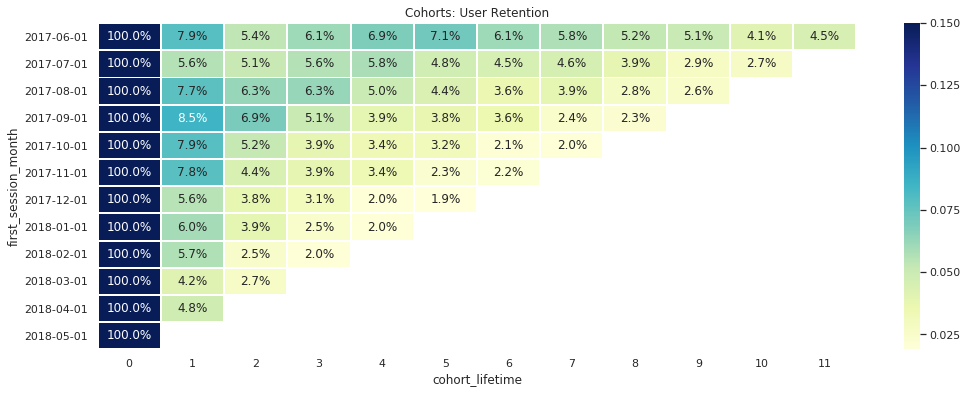

In [44]:
# Создание тепловой карты
sns.set(style='white')
plt.figure(figsize=(17, 6))
plt.title('Cohorts: User Retention')
ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, cmap="YlGnBu", vmax=0.15);
ax.set_yticklabels(retention_pivot.index.date)

# Вывод
Retention Rate в первый месяц убывает по когортам с течением времени. Если для когорты пользователей, пришедших в июне 2017 Retention Rate в первый месяц составляет 7,9%, то для пользователей, пришедших в апреле 2018 — уже 4,8%. Так, за 11 месяцев коэффициент удержания упал на 3,1%. Это говорит, что с каждой новой когортой поведение покупателей меняется. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки.

# 2.2 Продажи

# Когда люди начинают покупать?

Добавим в таблицу orders столбец со временем первой сесии

In [45]:
# Добавим в таблицу orders столбец first_session_date
orders = orders.join(first_session_date,on='uid')

Добавим столбец с разницей между временем покупки и началом первой сессии.

In [46]:
orders

,uid,revenue,bay_ts,first_session_date
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01 00:09:00
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01 00:14:00
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01 00:25:00
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01 00:14:00
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01 07:31:00
...,...,...,...,...
50410,12296626599487328624,4.64,2018-05-31 23:50:00,2018-05-31 09:11:00
50411,11369640365507475976,5.80,2018-05-31 23:50:00,2018-05-31 23:05:00
50412,1786462140797698849,0.30,2018-05-31 23:54:00,2018-05-31 23:52:00
50413,3993697860786194247,3.67,2018-05-31 23:56:00,2017-10-23 12:32:00


In [47]:
# Добавим столбец
orders['orders_time'] = orders['bay_ts'] - orders['first_session_date'] 
orders['orders_time'] = orders['orders_time'] / np.timedelta64(1,'h')

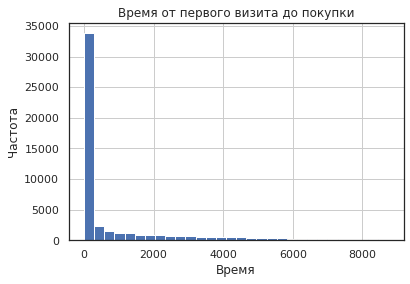

In [48]:
# Построим гистограмму
ax = orders['orders_time'].hist(bins=30)
plt.title('Время от первого визита до покупки')
ax.set_xlabel('Время')
ax.set_ylabel('Частота')
plt.show();


Посчитаем медиану по этому столбцу, т.к. есть выбросы по показателю.

In [49]:
# Найдем медиану с момента начала сессии до заказа
orders['orders_time'].median().round(1)

3.4

Вывод
Люди покупают примерно через 3,4 ч с момента первого захода на сайт.

# Сколько раз покупают за период?

Text(0.5, 1.0, 'Количество покупок за период')

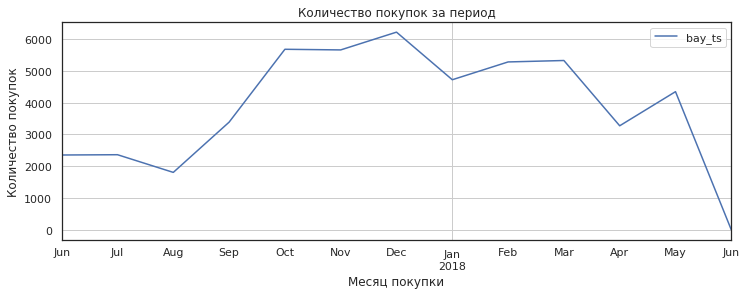

In [50]:
# Добавим столбец с номером месяца
orders['buy_month'] = orders['bay_ts'].astype('datetime64[M]')

# Построим график
orders.pivot_table(index='buy_month',values='bay_ts',aggfunc='count').plot(grid=True, figsize=(12, 4))
plt.xlabel('Месяц покупки')
plt.ylabel('Количество покупок')
plt.title('Количество покупок за период')

Вывод
На графике видно, что больше всего покупок было совершенно в декабре 2017 (более 100 тыс. раз и в феврале 2018 (около 90 тыс. раз). Меньше всего покупок в летние месяцы (30-40 тыс. раз)

# Какой средний чек?

In [51]:
# Группировка данных по когорте first_order_month и месяцу совершения заказа order_month
first_order_date = orders.groupby('uid')['bay_ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date,on='uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['bay_ts'].astype('datetime64[M]')
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'count'})
orders_grouped_by_cohorts.head()

revenue   uid
first_order_month order_month               
2017-06-01        2017-06-01   9557.49  2354
                  2017-07-01    981.82   177
                  2017-08-01    885.34   174
                  2017-09-01   1931.30   226
                  2017-10-01   2068.58   292

Найдём средний чек покупателя.

In [52]:
# Расчет среднего чека
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts['revenue_per_user'].mean().round(2)

7.65

In [53]:
orders_grouped_by_cohorts

revenue   uid  revenue_per_user
first_order_month order_month                                  
2017-06-01        2017-06-01    9557.49  2354          4.060106
                  2017-07-01     981.82   177          5.547006
                  2017-08-01     885.34   174          5.088161
                  2017-09-01    1931.30   226          8.545575
                  2017-10-01    2068.58   292          7.084178
...                                 ...   ...               ...
2018-03-01        2018-05-01    1114.87   176          6.334489
2018-04-01        2018-04-01   10600.69  2495          4.248774
                  2018-05-01    1209.92   195          6.204718
2018-05-01        2018-05-01   13925.76  3249          4.286168
2018-06-01        2018-06-01       3.42     1          3.420000

[79 rows x 3 columns]

Построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, как изменяется средний чек с течением времени

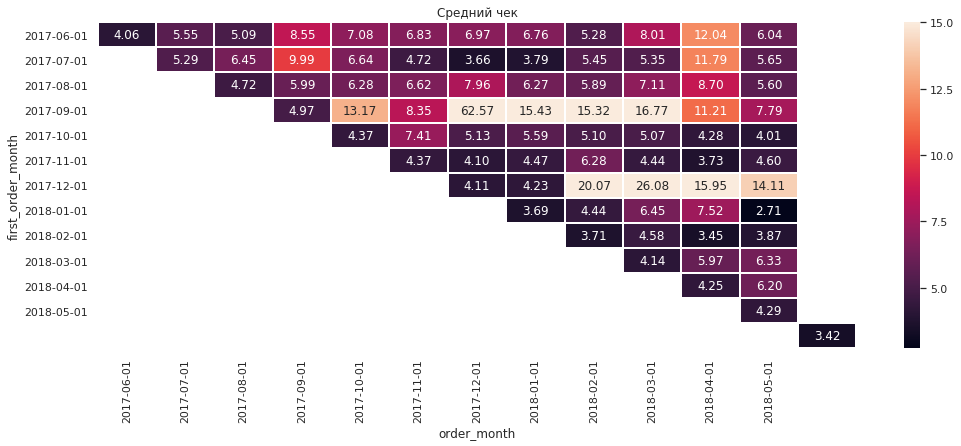

In [54]:
# Постройка сводной таблицы
orders_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean')

# Создание тепловой карты
sns.set(style='white')
plt.figure(figsize=(17, 6))
plt.title('Средний чек')
ax = sns.heatmap(orders_pivot, annot=True, fmt='.2f', linewidths=1, vmax=15);
ax.set_yticklabels(retention_pivot.index.date)
ax.set_xticklabels(retention_pivot.index.date)
plt.show()

Вывод
По таблице видно, что наибольший средний чек у пользователей сентябрьской, декабрьской когорты и июньской когорты. Средний чек по всем пользователям равен 7,65.

# Сколько денег приносят? (LTV)

Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [55]:
# <Считаем кол-во новых покупателей>
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'buyers']
cohort_sizes

,first_order_month,buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку

In [56]:
# Группируем таблицу
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [57]:
# Объединение таблиц
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Добавим в таблицу report валовую прибыль (умножив выручку на маржинальность) и возраст когорты. Примем, что средняя маржинальность магазина составляет 1000%

In [58]:
# Расчет валовой прибыли и возраста когорты
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

,first_order_month,buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


Найдём LTV, разделив валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Для наглядности визуализируем когорты в виде сводной таблицы:

In [59]:
# Нахождение LTV
report['ltv'] = report['gp'] / report['buyers']
    
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)

[Text(0, 0.5, '2017-06-01'),
 Text(0, 1.5, '2017-07-01'),
 Text(0, 2.5, '2017-08-01'),
 Text(0, 3.5, '2017-09-01'),
 Text(0, 4.5, '2017-10-01'),
 Text(0, 5.5, '2017-11-01'),
 Text(0, 6.5, '2017-12-01'),
 Text(0, 7.5, '2018-01-01'),
 Text(0, 8.5, '2018-02-01'),
 Text(0, 9.5, '2018-03-01'),
 Text(0, 10.5, '2018-04-01'),
 Text(0, 11.5, '2018-05-01')]

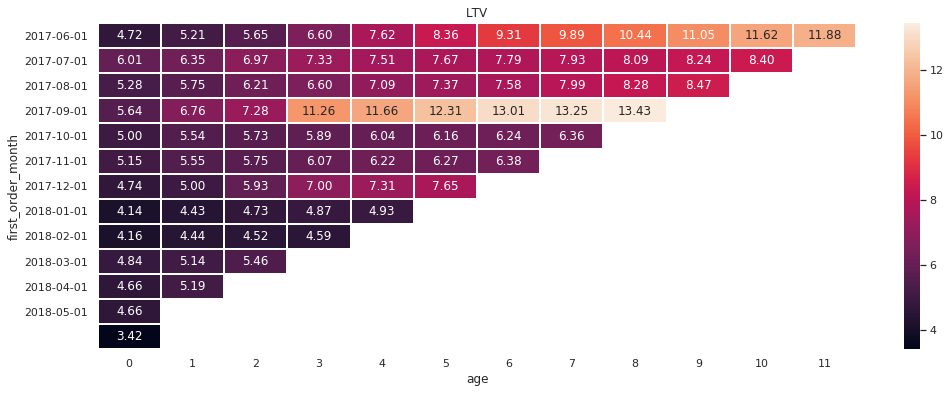

In [60]:
# Создание тепловой карты
sns.set(style='white')
plt.figure(figsize=(17, 6))
plt.title('LTV')
ax = sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1);
ax.set_yticklabels(retention_pivot.index.date)

Вывод
В среднем каждый покупатель из первой когорты принес по 11,88 рублей выручки за 12 месяцев «жизни». Выделяется когорта 2017-09-01 - по ней прибыль с каждого покупателя выше, чем по остальным.

# 2.3 Маркетинг

# Сколько денег потратили?

Посчитаем суммарные расходы за весь период

In [61]:
costs['costs'].sum()

329131.62

In [62]:
costs.head()

,source_id,costs,date
0,1,75.20,2017-06-01
1,1,62.25,2017-06-02
2,1,36.53,2017-06-03
3,1,55.00,2017-06-04
4,1,57.08,2017-06-05


Text(0.5, 1.0, 'Помесячная сумма затрат')

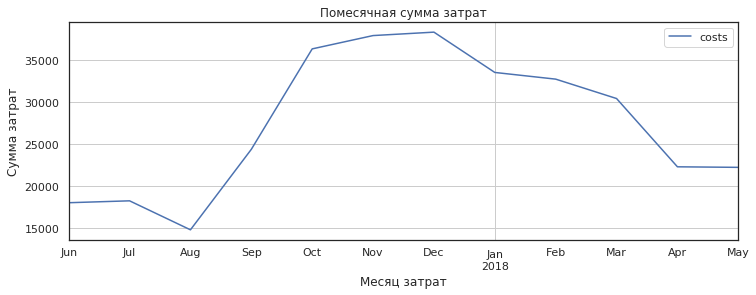

In [63]:
# Добавим столбце с месяцем затрат
costs['month'] = costs['date'].astype('datetime64[M]')

# Построим график
costs_pivot = costs.pivot_table(index='month',values='costs',aggfunc='sum')
costs_month_plot = costs_pivot.plot(grid=True, figsize=(12, 4)) 
plt.xlabel('Месяц затрат')
plt.ylabel('Сумма затрат')
plt.title('Помесячная сумма затрат')

Посмотрим на расходы по источникам.

In [1]:
# # Построим график
# costs_source = costs.pivot_table(index='source_id',values='costs',aggfunc='sum')
# costs_sourse_plot = costs_source.plot(grid=True, figsize=(12, 4)) 
# plt.xlabel('Источник затрат')
# plt.ylabel('Сумма затрат')
# plt.title('График затрат на каждый источник')

In [65]:
costs_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Text(0.5, 1.0, 'График затрат на каждый источник')

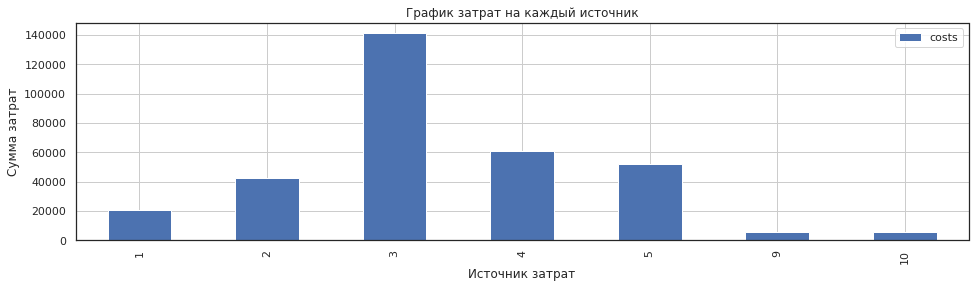

In [66]:
costs_sourse_plot = costs.pivot_table(index='source_id', values='costs', aggfunc='sum').plot(grid=True, kind='bar', figsize=(16, 4))
plt.xlabel('Источник затрат')
plt.ylabel('Сумма затрат')
plt.title('График затрат на каждый источник')

Вывод
Всего было затрачено 329131. Наибольшее кол-во затрат произошло в период с октября по декабрь, что можно объяснить высоким сезоном. Третий источник самый затратный, самый девешый - 9 и 10.

# Сколько стоило привлечение одного покупателя из каждого источника? (CAC)

# Найдем САС путем деления расходов из одого рекламного источника на число новых покупателей, пришедших из этого рекламного источника. Первоначально посчитаем расходы по рекламным источникам:

In [67]:
# Расходы по источникам
costs_source = costs.pivot_table(index=['source_id'],values='costs',aggfunc='sum').reset_index()
costs_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [68]:
costs.head()

,source_id,costs,date,month
0,1,75.20,2017-06-01,2017-06-01
1,1,62.25,2017-06-02,2017-06-01
2,1,36.53,2017-06-03,2017-06-01
3,1,55.00,2017-06-04,2017-06-01
4,1,57.08,2017-06-05,2017-06-01


In [69]:
orders.head()

,uid,revenue,bay_ts,first_session_date,orders_time,buy_month,first_order_date,first_order_month,order_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01 00:09:00,0.016667,2017-06-01,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01 00:14:00,0.183333,2017-06-01,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01 00:25:00,0.033333,2017-06-01,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01 00:14:00,0.250000,2017-06-01,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01 07:31:00,0.450000,2017-06-01,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [70]:
orders['bay_ts'] = pd.to_datetime(orders['bay_ts'], format = '%Y-%m')
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m' )
costs['month'] = pd.to_datetime(costs['month'], format = '%Y-%m')

In [71]:
first = orders.groupby('uid').agg({'buy_month': 'min'}).reset_index()
first.columns =['uid', 'first_orders']
first

,uid,first_orders
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [72]:
visits

,device,source_id,uid,start_ts,end_ts,session_month,session_week,session_date,session_duration_sec
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-01,2017-12-21,2017-12-27,0
...,...,...,...,...,...,...,...,...,...
359395,desktop,2,18363291481961487539,2017-07-29 19:07:00,2017-07-29 19:07:19,2017-07-01,2017-07-27,2017-07-29,19
359396,touch,1,18370831553019119586,2018-01-25 17:38:00,2018-01-25 17:38:19,2018-01-01,2018-01-25,2018-01-25,19
359397,desktop,4,18387297585500748294,2018-03-03 10:12:00,2018-03-03 10:12:19,2018-03-01,2018-03-01,2018-03-03,19
359398,desktop,5,18388616944624776485,2017-11-02 10:12:00,2017-11-02 10:12:19,2017-11-01,2017-11-02,2017-11-02,19


In [73]:
first_uid_source = visits.sort_values('start_ts').groupby('uid')['source_id'].first()

Далее посчитаем кол-во новых покупателей по источникам:

In [74]:
# Считаем кол-во новых покупателей по источникам

# first_source_per_user = visits.groupby('uid').agg({'source_id': 'first'})

client_per_source = orders.merge(first_uid_source, on='uid')
client_per_source = client_per_source.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
client_per_source = client_per_source.rename(columns={'source_id':'source_id','uid':'buyers'})
client_per_source

,source_id,buyers
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


Совместим вместе таблицы и расчитаем САС

In [75]:
# Раcсчитываем САС
report_new = pd.merge(costs_source, client_per_source, on='source_id')
report_new['cac'] = (report_new['costs'] / report_new['buyers']).round(2)
report_new

,source_id,costs,buyers,cac
0,1,20833.27,2899,7.19
1,2,42806.04,3506,12.21
2,3,141321.63,10473,13.49
3,4,61073.60,10296,5.93
4,5,51757.10,6931,7.47
5,9,5517.49,1088,5.07
6,10,5822.49,1329,4.38


In [76]:
# Расчитываем среднее значение и разброс САС
cac_mean = report_new['cac'].describe().round(2)
cac_mean

count     7.00
mean      7.96
std       3.53
min       4.38
25%       5.50
50%       7.19
75%       9.84
max      13.49
Name: cac, dtype: float64

Вывод
Среднее цена привлечения одного покупателя по источникам равняется 7,6. Минимальная цена привлечение одного покупателя из источника 9, но из него же и меньше всего кол-во привлеченных людей. Следует обратить внимания на источники 1 и 4, они наиболее оптимальные.

На сколько окупились расходы?

In [77]:
# Расходы по месяцам
costs_source = costs.pivot_table(index=['month'],values='costs',aggfunc='sum').reset_index()

# Расчитываем САС
cac = pd.merge(report, costs_source, left_on='first_order_month', right_on=['month'])
cac['cac'] = cac['costs'] / cac['buyers']

# Рассчитаем ROMI
cac['romi'] = cac['ltv'] / cac['cac']
romi = cac.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

# Среднее по строке ROMI
#romi.loc[:, 'ROMI'] = romi.mean(axis=1)

[Text(0, 0.5, '2017-06-01'),
 Text(0, 1.5, '2017-07-01'),
 Text(0, 2.5, '2017-08-01'),
 Text(0, 3.5, '2017-09-01'),
 Text(0, 4.5, '2017-10-01'),
 Text(0, 5.5, '2017-11-01'),
 Text(0, 6.5, '2017-12-01'),
 Text(0, 7.5, '2018-01-01'),
 Text(0, 8.5, '2018-02-01'),
 Text(0, 9.5, '2018-03-01'),
 Text(0, 10.5, '2018-04-01'),
 Text(0, 11.5, '2018-05-01')]

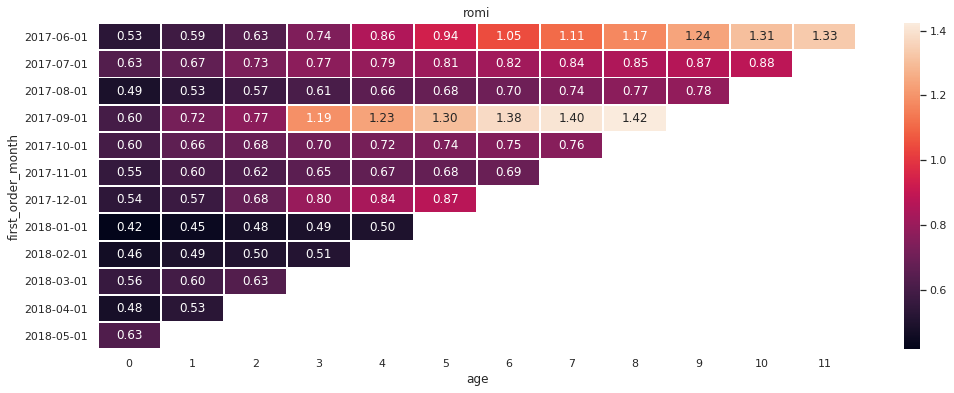

In [78]:
# Создание тепловой карты
sns.set(style='white')
plt.figure(figsize=(17, 6))
plt.title('romi')
ax = sns.heatmap(romi.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1);
ax.set_yticklabels(retention_pivot.index.date)

In [79]:
# Усредним значения по каждой колонки и «сложим» таблицу в единую строку
romi.iloc[:, :9].cumsum(axis=1).mean(axis=0).round(2)

age
0    0.54
1    0.58
2    0.63
3    0.72
4    0.78
5    0.86
6    0.90
7    0.97
8    1.05
dtype: float64

In [80]:
# Примем за 6 мес. жизненный цикл и найдем среднее значение LTV
LTV_mean = output.iloc[:7, :6]
LTV_mean.loc[:, 'LTV_sum'] = LTV_mean.sum(axis=1)
LTV_mean['LTV_sum'].mean().round(2)

7.97

In [81]:
# Рассчитаем ROMI по источникам
report_new['ltv_mean'] = 7.97
report_new['romi'] = (report_new['ltv_mean'] / report_new['cac']).round(2)
report_new.sort_values(by='romi', ascending=False)

,source_id,costs,buyers,cac,ltv_mean,romi
6,10,5822.49,1329,4.38,7.97,1.82
5,9,5517.49,1088,5.07,7.97,1.57
3,4,61073.60,10296,5.93,7.97,1.34
0,1,20833.27,2899,7.19,7.97,1.11
4,5,51757.10,6931,7.47,7.97,1.07
1,2,42806.04,3506,12.21,7.97,0.65
2,3,141321.63,10473,13.49,7.97,0.59


# Вывод
По ROMI видно, что в среднем когорты окупаются к концу 8 месяца. Самыми окупаемыми источниками оказались 5, 6 и 0.


По проведенному анализу можно сделать выводы:

Retention Rate в первый месяц убывает по когортам с течением времени. Если для когорты пользователей, пришедших в июне 2017 Retention Rate в первый месяц составляет 7,9%, то для пользователей, пришедших в апреле 2018 — уже 4,8%. Так, за 11 месяцев коэффициент удержания упал на 3,1%. Это говорит, что с каждой новой когортой поведение покупателей меняется. Возможно, были выбраны неэффективные источники трафика или ухудшилось качество работы службы поддержки; <br>
Среднее цена привлечения одного покупателя по источникам равняется 7,6. Минимальная цена привлечение одного покупателя из источника 9, но из него же и меньше всего кол-во привлеченных людей. Следует обратить внимания на источники 1 и 4, они наиболее оптимальные; <br>
В среднем каждый покупатель из первой когорты принес по 11,88 рублей выручки за 12 месяцев «жизни». Выделяется когорта 2017-09-01 - по ней прибыль с каждого покупателя выше, чем по остальным; <br>
По ROMI видно, что в среднем когорты окупаются к концу 8 месяца. Самыми окупаемыми источниками оказались 5, 6 и 0.
С компьютера заходят примерно раза в 2,5 чаще, чем с мобильных устройств. Рекомендуется больше уделять внимание этим пользователям.